In [ ]:
# 1. LOAD AND INSPECT DATA
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Problem 1
Using the California housing data example, study how the performance
of a certain ML method (e.g. RandomForestRegressor) depends on feature rescaling. For
example, what happens if we do not rescale the data at all? Or if we use a rescaling function
different than a log?

In [ ]:
housing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PHY391 MLPR/Data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Preprocess data
housing = housing.drop("ocean_proximity", axis="columns")
housing = housing.dropna(subset=["total_bedrooms"])

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

housing = housing.drop("total_rooms",axis="columns")
housing = housing.drop("total_bedrooms",axis="columns")
housing = housing.drop("population",axis="columns")

housing.head()

,longitude,latitude,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_ratio,population_per_household
0,-122.23,37.88,41.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


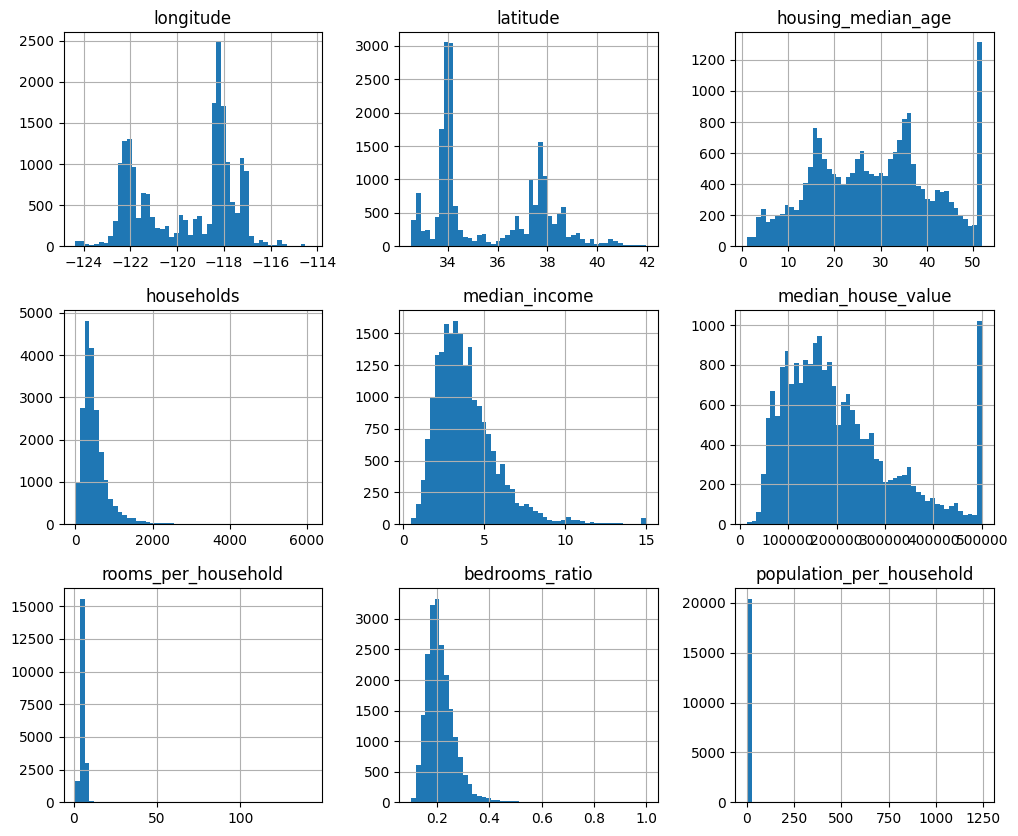

In [ ]:
housing.hist(bins=50,figsize=(12,10));

## Train a model without feature rescaling

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housingtr = train_set.copy()
housingtr_labels = housingtr["median_house_value"].copy()
housingtr_predictors = housingtr.drop("median_house_value", axis="columns")

housingtest = test_set.copy()
housingtest_labels = housingtest["median_house_value"].copy()
housingtest_predictors = housingtest.drop("median_house_value", axis="columns")

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housingtr_predictors, housingtr_labels)

housing_predictions = forest_reg.predict(housingtest_predictors)
forest_mse = mean_squared_error(housingtest_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

RMSE: 51556.48752339254


## Rescale the data with log function

In [ ]:
housing["rooms_per_household"] = housing["rooms_per_household"].apply(np.log)
housing["bedrooms_ratio"] = housing["bedrooms_ratio"].apply(np.log)
housing["population_per_household"] = housing["population_per_household"].apply(np.log)

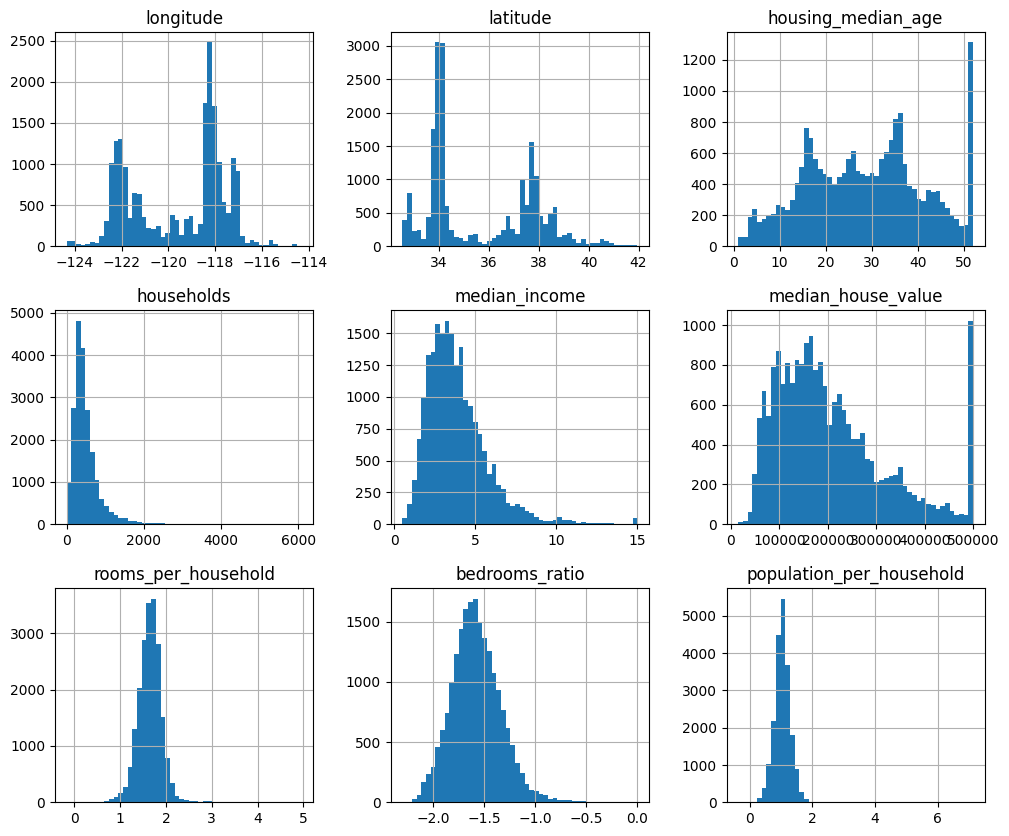

In [ ]:
housing.hist(bins=50,figsize=(12,10));

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housingtr = train_set.copy()
housingtr_labels = housingtr["median_house_value"].copy()
housingtr_predictors = housingtr.drop("median_house_value", axis="columns")

housingtest = test_set.copy()
housingtest_labels = housingtest["median_house_value"].copy()
housingtest_predictors = housingtest.drop("median_house_value", axis="columns")

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housingtr_predictors, housingtr_labels)

housing_predictions = forest_reg.predict(housingtest_predictors)
forest_mse = mean_squared_error(housingtest_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

RMSE: 51605.002025841335


## Rescale the data to 0 to 1

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housingtr = train_set.copy()
housingtr_labels = housingtr["median_house_value"].copy()
housingtr_predictors = housingtr.drop("median_house_value", axis="columns")

housingtest = test_set.copy()
housingtest_labels = housingtest["median_house_value"].copy()
housingtest_predictors = housingtest.drop("median_house_value", axis="columns")

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

housingtr_predictors_normed = min_max_scaler.fit_transform(housingtr_predictors)
housingtest_predictors_normed = min_max_scaler.fit_transform(housingtest_predictors)

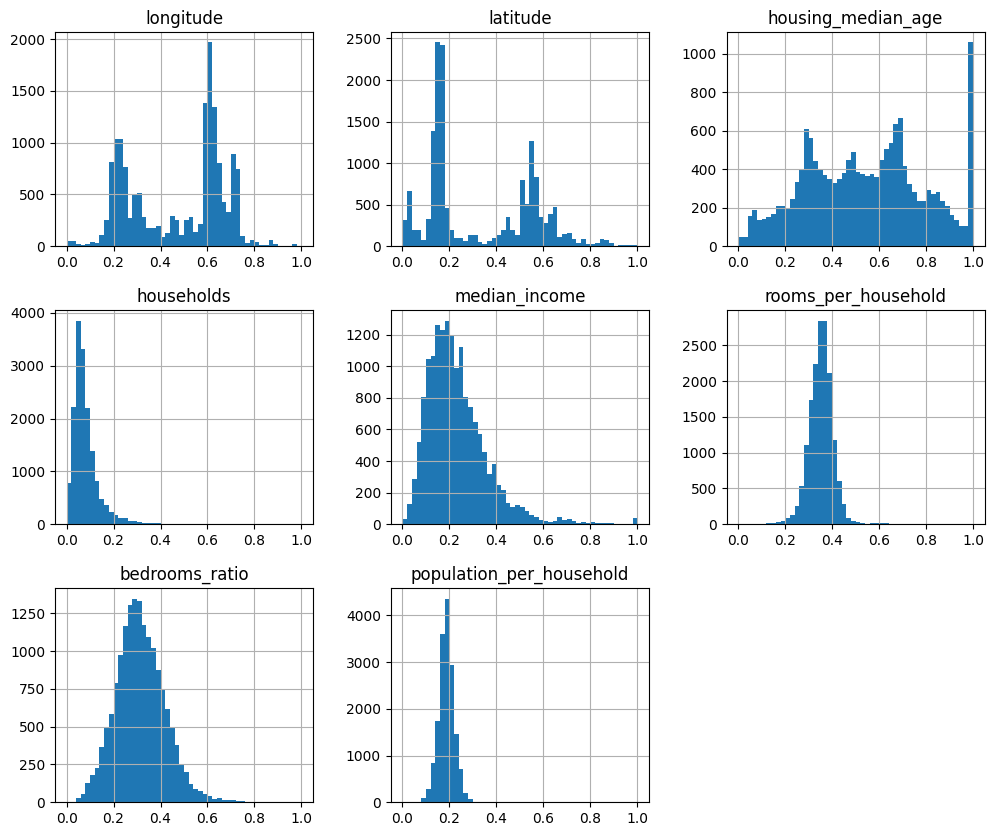

In [ ]:
pd.DataFrame(housingtr_predictors_normed, columns=housingtr_predictors.columns).hist(bins=50,figsize=(12,10));

In [ ]:
forest_reg = RandomForestRegressor()

forest_reg.fit(housingtr_predictors_normed, housingtr_labels)
housing_predictions = forest_reg.predict( housingtest_predictors_normed )
forest_mse = mean_squared_error(housingtest_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

RMSE: 69021.2347601775


## Rescale the data with StandardScaler

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housingtr = train_set.copy()
housingtr_labels = housingtr["median_house_value"].copy()
housingtr_predictors = housingtr.drop("median_house_value", axis="columns")

housingtest = test_set.copy()
housingtest_labels = housingtest["median_house_value"].copy()
housingtest_predictors = housingtest.drop("median_house_value", axis="columns")

In [ ]:
standard_scaler = StandardScaler()

housingtr_predictors_standard_scaled = standard_scaler.fit_transform(housingtr_predictors)
housingtest_predictors_standard_scaled = standard_scaler.fit_transform(housingtest_predictors)

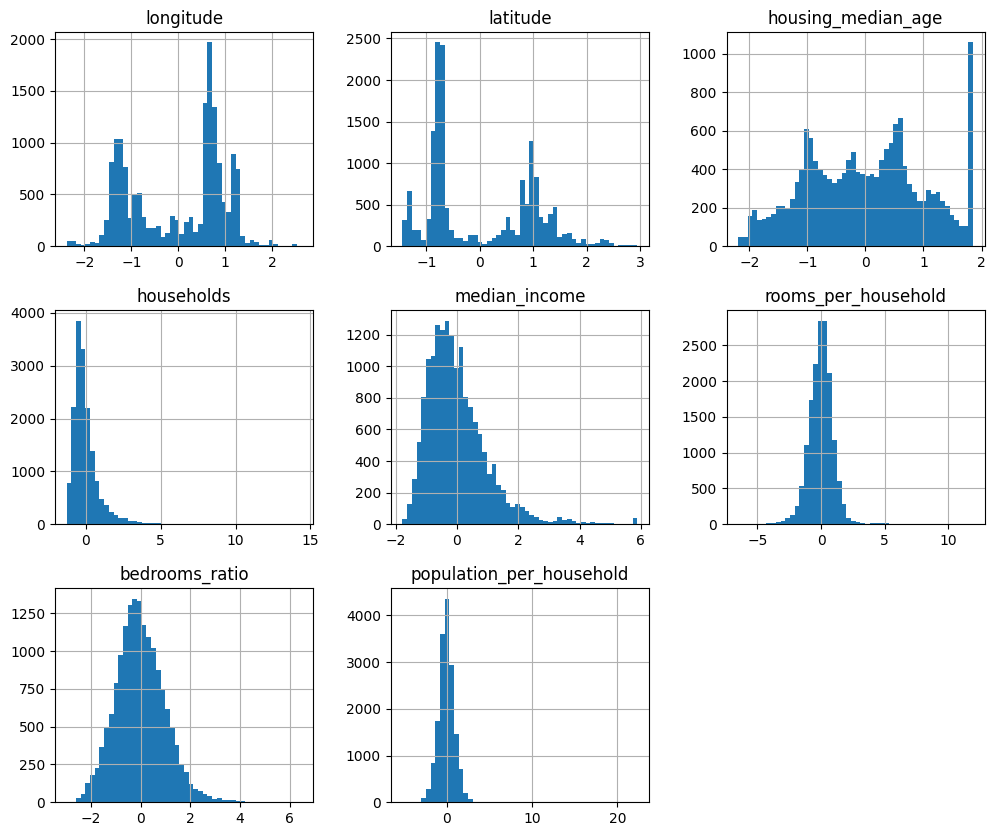

In [ ]:
pd.DataFrame(housingtr_predictors_standard_scaled, columns=housingtr_predictors.columns).hist(bins=50,figsize=(12,10));

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit( housingtr_predictors_standard_scaled, housingtr_labels )
housing_predictions = forest_reg.predict( housingtest_predictors_standard_scaled )
forest_mse = mean_squared_error(housingtest_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

RMSE: 53311.831596941236


The results above show that the rescaling did not improved the performance of the models.

# Problem 2
Geron, Third edition, Chapter 2, Excercise 1: Try to build a regressor for
the California housing datase using a support vector machine regressor (sklearn.svm.SVR)
with various hyperparameters, such as kernel=”linear” (with various values for the C hyper-
parameter) or kernel=”rbf” (with various values for the C and gamma hyperparameters).
Note that support vector machines don’t scale well to large datasets, so you should probably
train your model on just the first 5,000 instances of the training set and use only 3-fold cross-
validation, or else it will take hours. Don’t worry about what the hyperparameters mean for
now; we’ll discuss them in Chapter 5. How does the best SVR predictor perform?

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
housingtr_predictors_small = housingtr_predictors[:5000]
housingtr_labels_small = housingtr_labels[:5000]

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
housingtr_predictors_small_normed = min_max_scaler.fit_transform(housingtr_predictors_small)
housingtest_predictors_normed = min_max_scaler.fit_transform(housingtest_predictors)

In [ ]:
param_grid = [
        {'kernel': ['linear'], 'C': [100, 1000, 3000]},
        {'kernel': ['rbf'], 'C': [100, 1000, 3000],
         'gamma': [0.1, 1, 10]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(housingtr_predictors_small_normed, housingtr_labels_small)

grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'C': 3000, 'gamma': 1, 'kernel': 'rbf'}

The result above shows that a rbf model with C = 3000 and gamma = 1 performs best. Train a model with the parameter and check the performance.

In [ ]:
svr_rbf = SVR(kernel="rbf", C=3000, gamma=1)
svr_rbf.fit(housingtr_predictors_small_normed, housingtr_labels_small)

housing_predictions = svr_rbf.predict(housingtest_predictors_normed)
forest_mse = mean_squared_error(housingtest_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

RMSE: 77168.20655601594


It seesm the performance did not improved.

# Problem 3
(Modified from Acquaviva, Chapters 2 and 3). Inspect the data obtained
from the Planet Habitability Laboratory website (phl exoplanet catalog.csv) after first load-
ing them into a jupyter notebook. We will later try to predict planet habitability based on
three features: stellar mass, orbital period, and distance. This will be a classification prob-
lem with 0 (non-habitable), 1 (optimistically habitable) and 2 (reasonably habitable) as the
target classes. You don’t need to train a model for this problem yet.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PHY391 MLPR/Data/phl_exoplanet_catalog.csv")
data.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [ ]:
np.array(data.columns)

array(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN',
       'P_MASS_ERROR_MAX', 'P_RADIUS', 'P_RADIUS_ERROR_MIN',
       'P_RADIUS_ERROR_MAX', 'P_YEAR', 'P_UPDATED', 'P_PERIOD',
       'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'P_SEMI_MAJOR_AXIS',
       'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX',
       'P_ECCENTRICITY', 'P_ECCENTRICITY_ERROR_MIN',
       'P_ECCENTRICITY_ERROR_MAX', 'P_INCLINATION',
       'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX', 'P_OMEGA',
       'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_TPERI',
       'P_TPERI_ERROR_MIN', 'P_TPERI_ERROR_MAX', 'P_ANGULAR_DISTANCE',
       'P_IMPACT_PARAMETER', 'P_IMPACT_PARAMETER_ERROR_MIN',
       'P_IMPACT_PARAMETER_ERROR_MAX', 'P_TEMP_MEASURED', 'P_GEO_ALBEDO',
       'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_DETECTION',
       'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES',
       'P_ATMOSPHERE', 'S_NAME', 'S_RA', 'S_DEC', 'S_MAG', 'S_DISTANCE',
       'S_DISTANCE_ER

The columns needed are S_MASS, P_PERIOD, and P_DISTANCE.

In [ ]:
data = data[['P_NAME','S_MASS','P_PERIOD','P_DISTANCE', 'P_HABITABLE']]
data.head()

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,11 Com b,2.70,326.03000,1.324418,0
1,11 UMi b,2.78,516.21997,1.534896,0
2,14 And b,2.20,185.84000,0.830000,0
3,14 Her b,0.90,1773.40000,3.130558,0
4,16 Cyg B b,1.08,798.50000,2.043792,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_NAME       4048 non-null   object 
 1   S_MASS       3283 non-null   float64
 2   P_PERIOD     3938 non-null   float64
 3   P_DISTANCE   3978 non-null   float64
 4   P_HABITABLE  4048 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 158.2+ KB


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 4047
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_NAME       3180 non-null   object 
 1   S_MASS       3180 non-null   float64
 2   P_PERIOD     3180 non-null   float64
 3   P_DISTANCE   3180 non-null   float64
 4   P_HABITABLE  3180 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 149.1+ KB


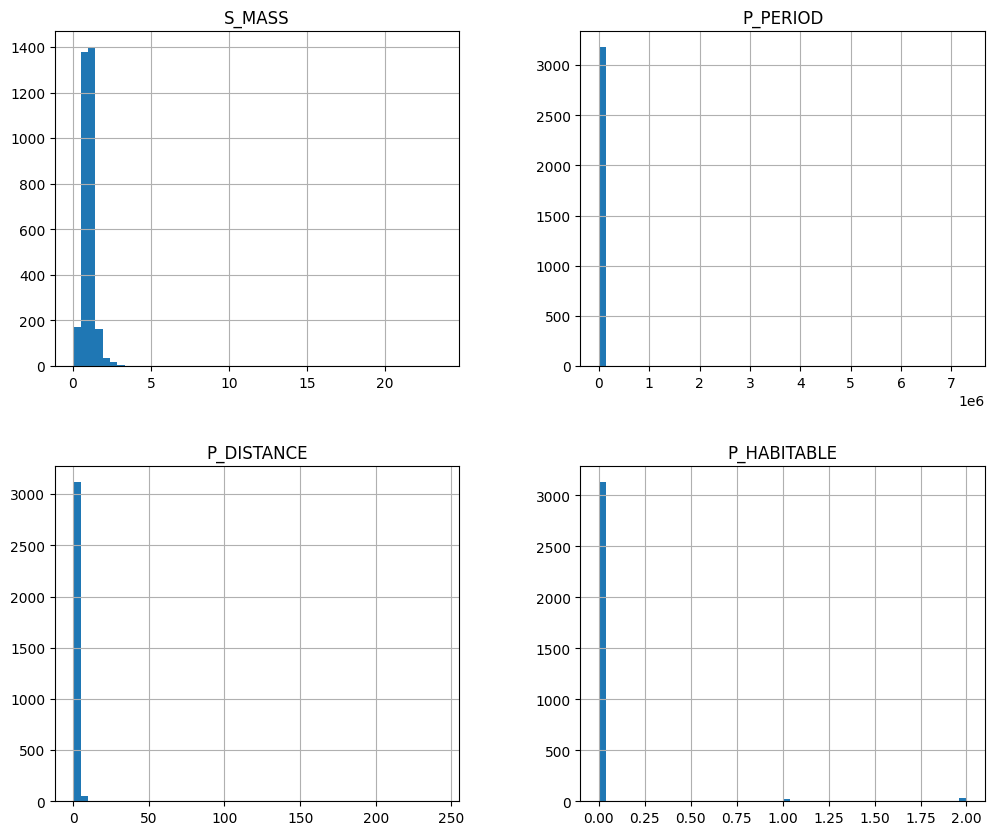

In [ ]:
data.hist(bins=50,figsize=(12,10));

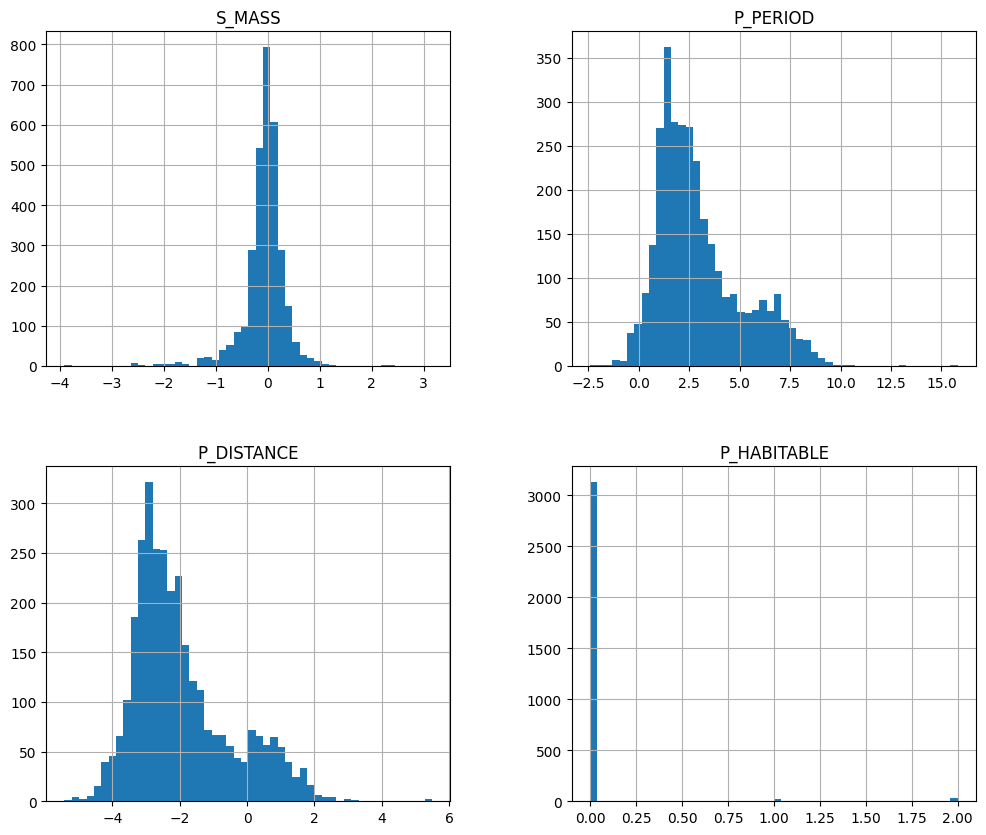

In [ ]:
.predicdata_log = data.copy()
data_log[['S_MASS','P_PERIOD','P_DISTANCE']] = data_log[['S_MASS','P_PERIOD','P_DISTANCE']].apply(np.log)
data_log.hist(bins=50,figsize=(12,10));

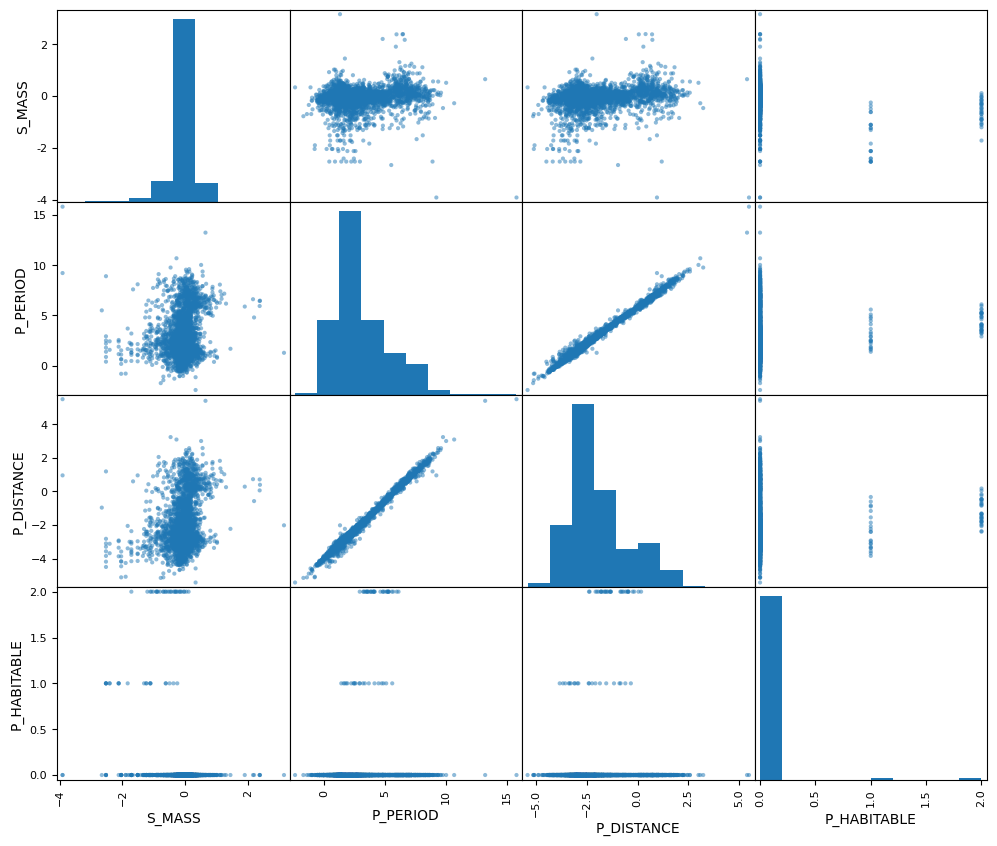

In [ ]:
scatter_matrix(data_log,figsize=(12,10));